# Chapter 04. 분류
지도학습 : 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식    
분류 : 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것.

## 결정트리
ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘으로 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것.    
새로운 규칙 조건마다 서브트리가 생성. 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어짐. 깊이가 깊어질수록 결정 트리의 예측 성능은 저하될 가능성이 높음.    

__정보의 균일도를 측정하는 방법__
* __정보 이득__ : 엔트로피라는 개념을 기반. 
    - 엔트로피는 주어진 데이터 집합의 혼잡도 의미.(서로 다른 값이 섞여 있으면 엔트로피 높음/같은 값이 섞여 있으면 엔트로피 낮음)    
    - 정보 이득 지수 : 1-엔트로피 지수. 결정 트리는 정보 이득이 높은 속성을 기준으로 분할.
* __지니 계수__ : 불평등 지수로 지니 계수가 낮을수록 데이터 균일도가 높음. 지니 계수가 낮은 속성을 기준으로 분할.

__결정 트리 모델의 특징__
- 장점 : '균일도'를 기반으로 하고 있어 알고리즘이 쉽고 직관적임. 정보의 균일도만 신경쓰면 되므로 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음.
- 단점 : 정확도가 떨어짐. 트리 깊이가 커지고 복잡할수록 예측 성능이 떨어지므로 트리의 크기를 사전에 제한하는 것이 성능 튜닝에 도움.

__결정 트리 파라미터__
* __min_samples_split__ :     
    노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용.    
    Default = 2, 작게 설정할수록 분할되는 노드가 많아져 과적합 가능성 증가.
* __min_samples_leaf__ :    
    말단 노드가 되기 위한 최소한의 샘플 데이터 수    
    과적합 제어 용도. 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있어 이 경우 작게 설정 필요
* __max_features__ :    
    최적의 분할을 위해 고려할 최대 피처 개수. default=None : 데이터 세트의 모든 피처를 사용해 분할.
    int형 : 대상 피처의 개수 / float형 : 전체 피처 중 대상 피처의 퍼센트
    'sqrt' : sqrt(전체 피처 개수) / 'auto' : sqrt와 동일
    'log : 전체 피처 중 log2(전체 피처 개수) 선정
* __max_depth__ : 
    트리의 최대 깊이 규정
    default=None : 완벽하게 클래스 결정 값이 될 떄까지 깊이를 계속 키우며 분할 혹은 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가.
    깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요.
* __max_leaf_nodes__ :    
    말단 노드의 최대 개수

__결정 트리 모델 시각화(Graphviz)__

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTree Classifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [6]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file='tree_dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, 
                impurity=True, filled=True)

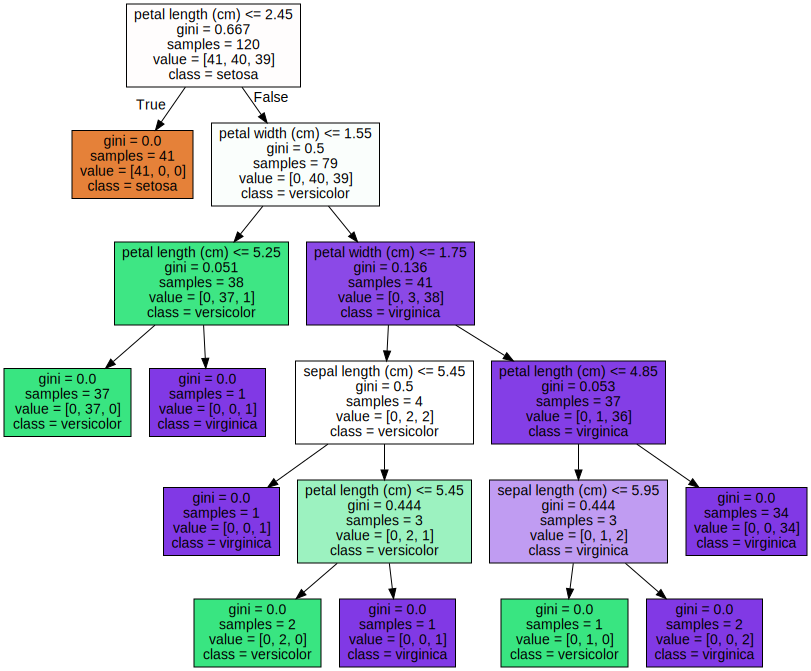

In [8]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree_dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

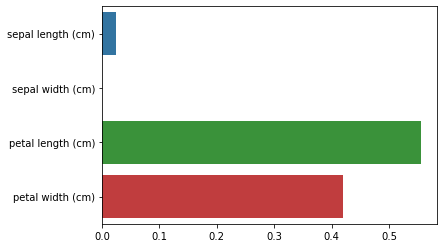

In [9]:
# 결정트리 알고리즘에서 중요도 추출
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))
    
# feature importance를 column별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

__결정 트리 과적합(Overfitting)__

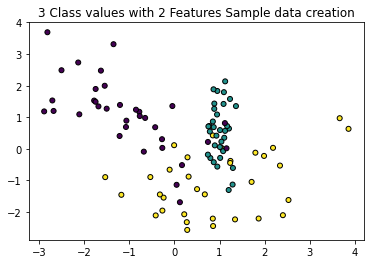

In [12]:
# 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 make_classification() 함수 제공
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k');

In [16]:
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이터로 model 학습 . test
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    # np.linspace : 1차원의 배열 만들기, 그래프 그리기에서 수평축의 간격 만들기
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    # ravel() : 다차원 배열을 1차원 배열로 바꾸는 함수. 복사본을 생성하지 않음.
    # np.c_[] : 두 배열을 가로 방향(왼쪽에서 오른쪽으로 합치기)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행. (등고선 그리기)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,levels=np.arange(n_classes + 1) - 0.5,cmap='rainbow' ,zorder=1)

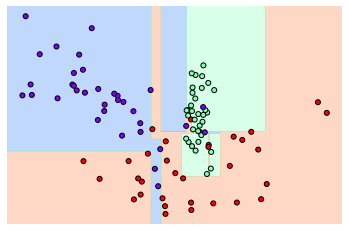

In [17]:
# 결정 기준 경계를 시각화
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

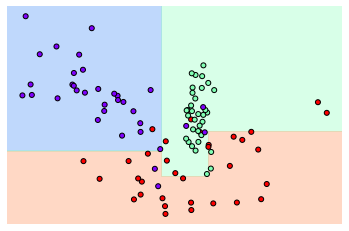

In [38]:
# min_samples_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 이상치에 크게 반응하지 않으면서 일반화된 분류 규칙에 따랍 분류됨.

__결정 트리 실습 - 사용자 행동 인식 데이터 셋__

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DF로 로드
feature_name_df = pd.read_csv('c:/data/human_activity/features.txt', sep='\s+',
                             header=None, names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [45]:
# 피처명을 가지고 있는 features.txt 파일은 중복된 피처명을 가지고 있어, 이를 DF로 로드하면 오류 발생. 
# 중복된 피처명 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [10]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer') # 인덱스로 조인
    # 두번째 이상인 경우 _숫자로 추가되게 함
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1])
                                                                                             if x[1]>0 else x[0], axis=1) 
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [11]:
import pandas as pd

def get_human_dataset():
    
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep로 할당
    feature_name_df = pd.read_csv('c:/data/human_activity/features.txt', sep='\s+',
                             header=None, names=['column_index','column_name'])
    
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    # 학습 피처 데이터셋과 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('c:/data/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('c:/data/human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩. 칼럼명은 action 적용
    y_train = pd.read_csv('c:/data/human_activity/train/y_train.txt', sep='\s+', header=None ,names=['action'])
    y_test = pd.read_csv('c:/data/human_activity/test/y_test.txt', sep='\s+', header=None ,names=['action'])
    
    # 로드된 학습/데이터용 DataFrame을 모두 반환
    return X_train,X_test,y_train,y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [80]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [81]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [84]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6,8,10,12,16,20,24],
    'min_samples_split':[16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 16}


In [86]:
# max_depth값에 따라어떻게 예측 성능이 변했는지 확인
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

# mean_test_score : 5개의 CV세트에서 검증용 데이터 셋의 정확도 평균 수치

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [88]:
# 별도의 테스트 데이터 셋에서 결정트리의 정확도 측정
max_depths = [6,8,10,12,16,20,24]

# max_depth 값을 변화시키면서 그떄마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [89]:
# max_depth와 min_samples_split을 같이 변경하면서 정확도 성능 튜닝
params = {'max_depth' : [8,12,16,20],
         'min_samples_split' : [16,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 16}


In [90]:
# 최적 하이퍼 파라미터로 학습이 완료된 estimator 객체로 예측 수행
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


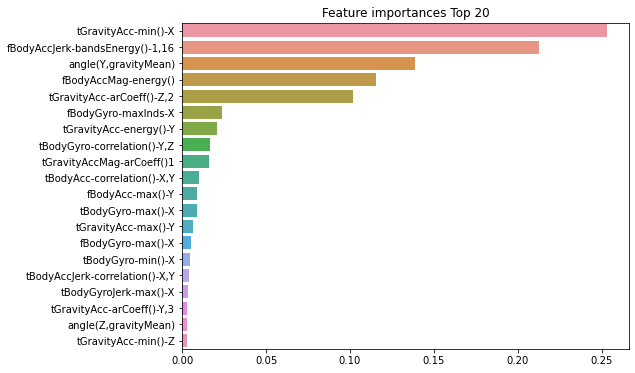

In [91]:
# 각 피처의 중요도 시각화
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 series로 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 앙상블 학습
여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
* __보팅(Voting)__ : 서로 다른 알고리즘을 가진 분류기를 결합
    - __하드 보팅__ : 다수결 원칙. 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
    - __소프트 보팅__ : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정.
* __배깅(Bagging)__ : 각각의 분류기가 모두 같은 유형의 알고리즘 기반. 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행
* __부스팅(Boosting)__ : 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게 가중치 부여.
* __스태킹(Stacking)__ : 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측

__보팅 분류기(Voting Classifier)__    
보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 셋 예측 분석

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도 : 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9386


## 랜덤 포레스트
여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 함.    
랜덤 포레스트의 서브셋 데이터는 부트스트래핑(여러 개의 작은 데이터 셋을 임의로 만들어 개별 평균의 분포도를 측정. 중첩되게 분리함.)으로 데이터가 임의로 만들어짐. 그렇게 데이터가 중첩된 개별 데이터 셋에 결정 트리 분류기를 각각 적용.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DF 반환
X_train,X_Test,y_train,y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도 : 0.9196


__랜덤 포레스트 하이퍼 파라미터 및 튜닝__    
* __n_estimators__ : 랜덤 포레스트에서 결정 트리의 개수를 지정. 디폴트는 10개. 늘릴수록 좋은 성능을 기대할 수 있지만, 성능이 무조건 향상되는 건 아님. 또한 학습 수행 시간이 오래 걸리는 것도 감안해야 함.
* __max_features__ : 결정 트리의 max_features와 동일. default는 'auto' : sqrt(전체 피처 개수)
* __max_depth, min_samples_leaf, min_samples_split__ 결정트리의 파라미터가 동일하게 적용

In [14]:
# GridSearchCV를 이용해 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[8,16,24],
         'min_samples_leaf':[1,6,12],
         'min_samples_split':[2,8,16]}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1) #n_jobs=-1 : 모든 cpu코어를 이용해 학습 가능
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도:0.9165


In [16]:
# 최적 하이퍼 파라미터로 rancdomforest classifier 학습시킨 뒤 별도의 테스트 데이터셋에서 예측 성능 측정
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16,
                                min_samples_split=2, random_state=0)
rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9260


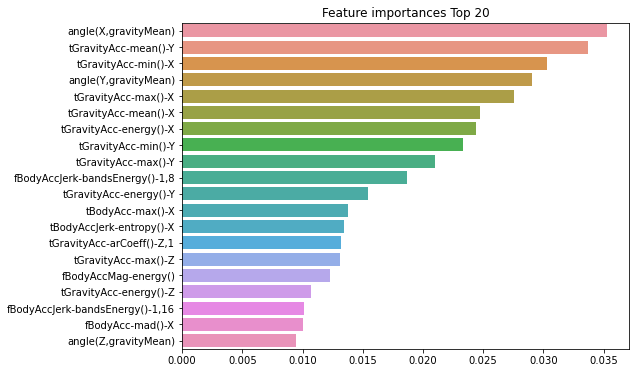

In [17]:
# 피처 중요도 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## GBM(Gradient Boosting Machine)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train,X_Test,y_train,y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {:.1f} 초'.format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 1081.6 초


GBM은 랜덤 포레스트보다 예측 성능이 조금 뛰어난 경우가 많음. 그러나 수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력도 더 필요함. 

__GBM 하이퍼 파라미터__    
* __loss__ : 경사 하강법에서 사용할 비용 함수 지정. 특별한 이유가 없으면 기본값인 'deviance'를 그대로 적용.
* __learning_rate__ : 학습을 진행할 때마다 적용하는 학습률로 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수. 0~1 사이의 값을 지정하며 기본값 = 0.1임. 너무 작은 값을 적용하면 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높지만, 수행 시간이 오래걸림. 반대로 큰 값을 적용하면 최소 오류값을 찾지 못하고 그냥 지나칠 수 있지만, 시간은 빠름.
* __n_estimators__ : weak learner의 개수. 순차적으로 오류를 보정하므로 개수가 많을 수록 예측 성능이 일정 수준까지 좋아질 수 있음. 개수가 많을수록 수행시간이 오래 걸림. learning_rate와 상호 보완적으로 사용함. learning_rate를 작게 하고 n_estimators를 크게 하면 더 이상 성능이 좋아지지 않는 한계점까지는 예측 성능이 조금씩 좋아질 수 있음.
* __subsample__ : weak learner가 학습에 사용하는 데이터의 샘플링 비율. 기본값 = 1이고, 이는 전체 학습 데이터를 기반으로 학습한다는 의미. 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정

## XGBoost(eXtra Gradient Boost)
* 뛰어난 예측 성능 : 분류와 회귀 영역에서 뛰어난 예측 성능
* GBM 대비 빠른 수행 시간 : 병렬 수행 및 다양한 기능으로 GBM에 비해 빠른 수행 성능 보장.
* 과적합 규제 : 표준 GBM의 경우 과적합 규제 기능이 없으나 XGBoost는 자체에 과적합 규제 기능으로 과적합에 좀 더 강한 내구성 가짐.
* 나무 가지치기 : max_depth로 분할 깊이를 조정하기도 하지만, tree pruning으로 더 이상 긍정 이득 없는 분할을 가지치기 해서 분할 수를 줄이는 장점이 있음.
* 자체 내장된 교차 검증 : 반복 수행 시마다 내부적으로 교차 검증을 수행해 최적화된 반복 수행 횟수를 가짐. 지정된 반복 횟수가 아니라 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화 되면 반복을 중간에 멈출 수 있는 조기 중단 기능 있음.
* 결손값 자체 처리 : XGBoost는 결손값을 자체 처리할 수 있는 기능이 있음.
__하이퍼 파라미터__    
* 일반 파라미터 : 디폴트 파라미터 값을 바꾸는 경우는 거의 없음.
    - __booster__ : gbtree(tree base model) 또는 gblinear(linear model) 선택, 디폴트는 gbtree
    - __silent__ : 디폴트는 0. 출력 메시지를 나타내고 싶지 않을 때 1
    - __nthread__ : CPU의 실행 스레드 개수 조정. 디폴트는 CPU 전체 스레드를 다 사용하는 것.
* 부스터 파라미터
    - __eta[default=0.3,alias:learning_rate]__ : GBM의 learning_rate와 같은 파라미터. 보통은 0.01~0.2의 값 선호. 싸이킷런 래퍼 클래스의 경우 디폴트는 0.1
    - __num_boost_rounds__ : GBM의 n_estimators와 같은 파라미터
    - __min_child_weight[default=1]__ : 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 가중치 총합. 클수록 분할을 자제함. 과적합을 조절하기 위해 사용.
    - __gamma[default=0, alias: min_split_loss]__ : 트리의 리프노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값. 해당 값보다 큰 손실이 감소된 경우에 리프 노드 분리. 값이 클수록 과적합 감소 효과가 있음.
    - __max_depth[default=6]__ : 트리 기반 알고리즘의 max_depth와 같음. 0을 지정하면 깊이에 제한이 없음. 높을수록 특정 피처 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통은 3~10 사이의 값을 적용.
    - __sub_sample[default=1]__ : GBM의 subsample과 동일. 일반적으로 0.5~1사이의 값 사용.
    - __colsample_bytree[default=1]__ : GBM의 max_feature와 유사함. 트리 생성에 필요한 피처를 임의로 샘플링 하는데 사용하여 과적합을 조정하는데 적용.
    - __lambda[default=1, alias:reg_lambda]__ : L2 Regularization 적용 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음.
    - __alpha[default=0, alias:reg_alpha]__ : L1 Regularization 적용 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음.
    - __scale_pos_weight[default=1]__ : 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 셋의 균현을 유지하기 위한 파라미터
* 학습 태스크 파라미터
    - __objective__ : 최솟값을 가져야 할 손실 함수 정의. 
    - __binary:logistic__ : 이진 분류일 때 적용.
    - __multi:softmax__ : 다중 분류일 때 적용. 해당 손실함수를 적용할 경우 레이블 클래스 개수인 num_class 파라미터 지정해야 함.
    - __multi:softporb__ : 개별 레이블 클래스의 해당되는 예측 확률 반환
    - __eval_metric__ : 검증에 사용되는 함수 적용. 기본값은 회귀의 경우 rmse, 분류일 경우 error
    (rmse, mae, logloss, error, merror, mlogloss, auc)

__과적합 문제가 심각할 때__
- eta 값을 낮춤(0.01~0.1). num_round(n_estimators)는 반대로 높여줘야 함.
- max_depth 값을 낮춤.
- min_child_weight 값을 높임.
- gamma 값을 높임
- subsample과 colsample_bytree를 조정하는 것도 트리가 복잡하게 생성되는 것을 막아 과적합 문제에 도움.

In [1]:
import xgboost as xgb
print(xgb.__version__)

1.6.0


__파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측__

In [2]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [3]:
# 레이블 값의 분포 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [4]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 컬럼이 Lable임. Feature용 DataFrame은 cancer_df의 첫번째 컬럼에서 맨 마지막 두번째 컬럼까지를 :-1 슬라이싱으로 추출
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(364, 30) (91, 30)


In [5]:
# XGBoost는 Dmatrix를 사용
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안 될 경우 X_train.values로 넘파이 변환
# 학습, 검증, 테스트용 DMatrix를 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [6]:
params = {'max_depth':3, # 트리 최대 깊이
         'eta':0.05, # 학습률
         'objective':'binary:logistic', # 이진 분류이므로 이진 로지스특
         'eval_metric':'logloss'
         }
num_rounds = 400 # 부스팅 반복 횟수

In [9]:
# 조기 중단의 성능 평가는 별도의 검증 데이터 셋을 이용함. 이때 평가용 데이터 셋 지정과 eval_metric을 함꼐 설정
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기함.
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')]만 명기해도 무방함.

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.64965	eval-logloss:0.65721
[1]	train-logloss:0.61035	eval-logloss:0.62496
[2]	train-logloss:0.57484	eval-logloss:0.59755
[3]	train-logloss:0.54165	eval-logloss:0.57116
[4]	train-logloss:0.51171	eval-logloss:0.54850
[5]	train-logloss:0.48304	eval-logloss:0.52579
[6]	train-logloss:0.45752	eval-logloss:0.50718
[7]	train-logloss:0.43269	eval-logloss:0.48616
[8]	train-logloss:0.40968	eval-logloss:0.46626
[9]	train-logloss:0.38902	eval-logloss:0.44961
[10]	train-logloss:0.36904	eval-logloss:0.43292
[11]	train-logloss:0.35044	eval-logloss:0.41685
[12]	train-logloss:0.33364	eval-logloss:0.40267
[13]	train-logloss:0.31734	eval-logloss:0.38927
[14]	train-logloss:0.30210	eval-logloss:0.37622
[15]	train-logloss:0.28746	eval-logloss:0.36444
[16]	train-logloss:0.27375	eval-logloss:0.35352
[17]	train-logloss:0.26117	eval-logloss:0.34391
[18]	train-logloss:0.24901	eval-logloss:0.33391
[19]	train-logloss:0.23785	eval-logloss:0.32509
[20]	train-logloss:0.22698	eval-logloss:0.31733
[2

65회의 logloss가 0.21470으로 가장 낮고, early_stopping_rounds를 50으로 설정해 50회 동안 logloss값이 향상되지 않았기 때문에 115회에서 멈춤.

In [10]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨.')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값을 결정하여 list 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨.
[0.979 0.023 0.686 0.141 0.985 0.996 0.996 0.995 0.994 0.005]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [15]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, accuracy_score, precision_score, recall_score

def get_clf_eval(y_test,pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1, roc_auc))

In [22]:
get_clf_eval(y_test,preds,pred_probs)

오차 행렬
[[34  3]
 [ 3 74]]
정확도:0.9474, 정밀도:0.9610, 재현율:0.9610, F1:0.9610, AUC:0.9912


In [23]:
# 싸이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
                           eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [24]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도:0.9649, 정밀도:0.9620, 재현율:0.9870, F1:0.9744, AUC:0.9954


In [39]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr,y_tr),(X_val,y_val)] # 아의 튜플이 학습용 데이터, 뒤의 튜플이 검증용 데이터로 자동 인식
xgb_wrapper.fit(X_tr,y_tr,early_stopping_rounds=50, eval_metric='logloss',eval_set=evals, verbose=True) 
#verbose=False or 0은 출력하지 않음

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.64965	validation_1-logloss:0.65721
[1]	validation_0-logloss:0.61035	validation_1-logloss:0.62496
[2]	validation_0-logloss:0.57484	validation_1-logloss:0.59755
[3]	validation_0-logloss:0.54165	validation_1-logloss:0.57116
[4]	validation_0-logloss:0.51171	validation_1-logloss:0.54850
[5]	validation_0-logloss:0.48304	validation_1-logloss:0.52579
[6]	validation_0-logloss:0.45752	validation_1-logloss:0.50718
[7]	validation_0-logloss:0.43269	validation_1-logloss:0.48616
[8]	validation_0-logloss:0.40968	validation_1-logloss:0.46626
[9]	validation_0-logloss:0.38902	validation_1-logloss:0.44961
[10]	validation_0-logloss:0.36904	validation_1-logloss:0.43292
[11]	validation_0-logloss:0.35044	validation_1-logloss:0.41685
[12]	validation_0-logloss:0.33364	validation_1-logloss:0.40267
[13]	validation_0-logloss:0.31734	validation_1-logloss:0.38927
[14]	validation_0-logloss:0.30210	validation_1-logloss:0.37622
[15]	validation_0-logloss:0.28746	validation_1-logloss:0.36444
[1

In [37]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[35  2]
 [ 3 74]]
정확도:0.9561, 정밀도:0.9737, 재현율:0.9610, F1:0.9673, AUC:0.9923


In [40]:
# early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper.fit(X_tr,y_tr,early_stopping_rounds=10,eval_metric='logloss',eval_set=evals,verbose=0)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)
# early stopping을 50으로 설정할때보다 정확도가 더 낮음

오차 행렬
[[35  2]
 [ 4 73]]
정확도:0.9474, 정밀도:0.9733, 재현율:0.9481, F1:0.9605, AUC:0.9919


## LightGBM
XGBoost보다 학습에 걸리는 시간이 적고, 메모리 사용량도 상대적으로 적음. 단점은 적은 데이터 셋(일반적으로 10,000건 이하)에 적용할 경우 과적합이 발생하기 쉬움.    
리프 중심 트리 분할 방식으로 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성.

__LightGBM 하이퍼 파라미터__    
* 주요 파라미터 
    - __num_iterations[default=100,alias:n_estimators]__ : 반복 수행하려는 트리의 개수 지정. 크게 지정할수록 예측 성능이 높아질 수 있으나, 너무 크게 지정하면 오히려 과적합으로 성능이 저하될 수 있음.
    - __learning_rate[default=0.1]__ : 0에서 1사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값.
    - __max_depth[default=-1]__ : 0보다 작은 값을 지정하면 깊이에 제한이 없음. Leaf wise 기반으로 깊이가 상대적으로 더 깊음.
    - __min_data_in_leaf[default=20,alias:min_child_samples]__ : 결정 트리의 min_samples_leaf와 같음. 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수, 과적합을 제어하기 위한 파라미터
    - __num_leaves[default=31]__ : 하나의 트리가 가질 수 있는 최대 리프 개수
    - __boosting[default=gbdt]__ : 부스팅의 트리를 생성하는 알고리즘. (gbdt:일반적인 그래디언트 부스팅 결정 트리/rf:랜덤포레스트)
    - __bagging_fraction[default=1.0, alias:subsample]__ : 트리가 커져서 과적합되는 것을 제어하기 위해서 데이터를 샘플링하는 비율을 지정.
    - __feature_fraction[default=1.0,alias:colsample_bytree]__ : 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율. 과적합을 막기 위해 사용됨.
    - __lambda_l2[default=0.0,alias:reg_lambda]__ : L2 Regularization 적용 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음.
    - __lambda_l1[default=0.0,alias:reg_alpha]__ : L1 Regularization 적용 값. L2와 마찬가지로 과적합 제어를 위한 것.
* 학습 태스크 파라미터
    - __objective__ : 최솟값을 가져야 할 손실 함수 정의. 
    
__하이퍼 파라미터 튜닝 방안__    
- num_leaves의 개수를 높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 모델의 복잡도가 커져 과적합 영향도가 커짐.
- min_data_in_leaf(min_child_samples)는 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지함.
- max_depth는 명시적으로 깊이의 크기를 제한함. num_leaves, min_data_in_leaf와 결합해 과적합을 개선하는 데 사용.
- learning_rate를 작게 하면서 n_estimators를 크게 함. 이 때, n_estimators를 너무 크게 하면 과적합으로 성능 저하될 수 있음.

__LightGBM 적용-위스콘신 유방암 예측__

In [41]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']=dataset.target
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_tr, y_tr),(X_val,y_val)]
lgbm_wrapper.fit(X_tr,y_tr,early_stopping_rounds=50,eval_metric='logloss',eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	training's binary_logloss: 0.618281	valid_1's binary_logloss: 0.657219
[2]	training's binary_logloss: 0.581501	valid_1's binary_logloss: 0.623193
[3]	training's binary_logloss: 0.547162	valid_1's binary_logloss: 0.591294
[4]	training's binary_logloss: 0.517044	valid_1's binary_logloss: 0.564012
[5]	training's binary_logloss: 0.488875	valid_1's binary_logloss: 0.540575
[6]	training's binary_logloss: 0.462743	valid_1's binary_logloss: 0.515623
[7]	training's binary_logloss: 0.438946	valid_1's binary_logloss: 0.496285
[8]	training's binary_logloss: 0.416626	valid_1's binary_logloss: 0.476931
[9]	training's binary_logloss: 0.396256	valid_1's binary_logloss: 0.460624
[10]	training's binary_logloss: 0.377452	valid_1's binary_logloss: 0.445433
[11]	training's binary_logloss: 0.359003	valid_1's binary_logloss: 0.428638
[12]	training's binary_logloss: 0.342203	valid_1's binary_logloss: 0.41445
[13]	training's binary_logloss: 0.327155	valid_1's binary_logloss: 0.4017
[14]	training's binary_l

In [46]:
get_clf_eval(y_test,preds,pred_proba)

오차 행렬
[[33  4]
 [ 3 74]]
정확도:0.9386, 정밀도:0.9487, 재현율:0.9610, F1:0.9548, AUC:0.9898


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

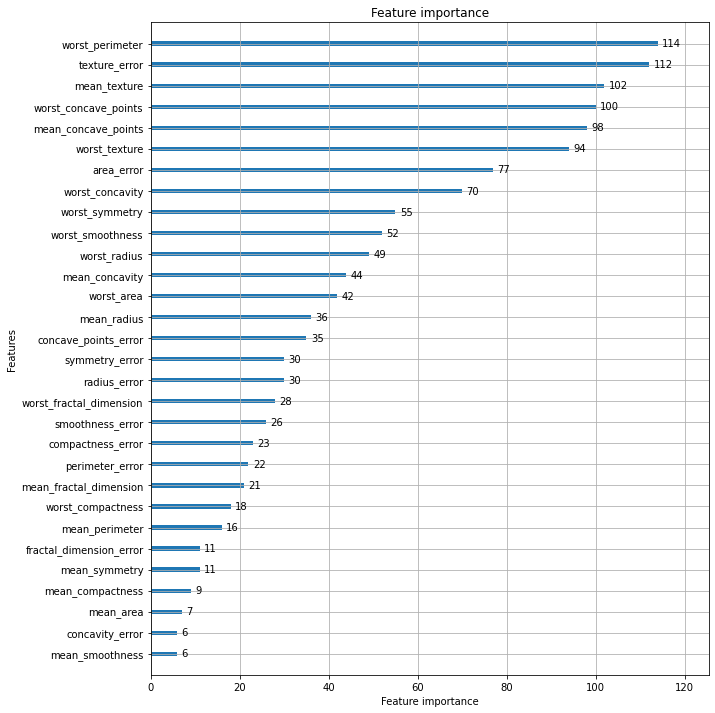

In [50]:
# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

## 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝
GridSearch 방식을 이용할 때에는 하이퍼 파라미터 최적화 시간 때문에 많은 시간이 소모됨. 그에 대한 대체 방안이 베이지안 최적화 기법.
1. 최초에는 랜덤하게 하이퍼 파라미터들을 샘플링하고 성능 결과를 관측함.
2. 관측된 값을 기반으로 대체 모델은 최적 함수를 추정함. 최적 관측값은 y축 value에서 가장 높은 값을 가질 때의 하이퍼 파라미터
3. 획득함수는 다음으로 관측할 하이퍼 파라미터 값을 계산함. 이전의 최적 관측값보다 더 큰 최댓값을 가질 가능성이 높은 지점을 찾아서 다음에 관측할 하이퍼 파라미터를 대체 모델에 전달함.
4. 획득함수로부터 전달된 하이퍼 파라미터를 수행하여 관측된 값을 기반으로 대체 모델은 갱신되어 다시 최적 함수를 예측 추정

__HyperOpt 사용하기__

In [52]:
# 입력 변수명과 입력값의 검색 공간 설정
from hyperopt import hp

# -10 ~ 10까지 1간격을 가지는 입력변수 x와 -15 ~ 15까지 1간격으로 입력 변수 y 설정
search_space = {'x':hp.quniform('x',-10,10,1), 'y':hp.quniform('y',-15,15,1)}

* hp.quniform(label,low,high,q) : label로 지정된 입력값 변수 검색 공간을 최솟값 low에서 최댓값 high까지 q의 간격을 가지고 설정.
* hp.uniform(label,low,high) : 최솟값 low에서 최댓값 high까지 정규 분포 형태의 검색 공간 설정.
* hp.randint(label,upper) : 0부터 최댓값 upper까지 random한 정숫값으로 검색 공간 설정.
* hp.loguniform(label,low,high) : exp(uniform(low,high))값을 반환하며, 반환 값의 log 변환 된 값은 정규 분포 형태를 가지는 검색 공간 설정.
* hp.choice(label,options) : 검색값이 문자열 또는 문자열과 숫자값이 섞여 있을 경우 설정. options는 리스트나 튜플 형태로 제공되며 hp.choice('tree_criterion',['gini','entropy'])와 같이 설정하면 입력변수  tree_criterion값을 gini와 entropy로 설정하여 입력함.

In [54]:
from hyperopt import STATUS_OK

# 목적 함수를 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    
    return retval

__fmin 함수 제공__    
* fn: 위에서 생성한 objective_func와 같은 목적 함수.
* space : 위에서 생성한 search_space와 같은 검색 공간 딕셔너리.
* algo : 베이지안 최적화 적용 알고리즘. 기본적으로 tpe.suggest(TPE : Tree of Parzen Estimator 의미)
* max_evals : 최적 입력값을 찾기 위한 입력값 시도 횟수.
* trials : 최적 입력값을 찾기 위해 시도한 입력값 및 해당 입력값의 목적 함수 반환값 결과를 저장하는 데 사용. Trials 클래스를 객체로 생성한 변수명을 입력.
* rstate : fmin을 수행할 때마다 동일한 결괏값을 가질 수 있도록 설정하는 랜덤 시드 값.

In [55]:
from hyperopt import fmin, tpe, Trials
# 입력 결괏값을 저장한 Trials 객체값 생성.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄.
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5,
              trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:',best_01)

100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 412.61trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [60]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20,
              trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:',best_02)

100%|███████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 550.33trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [63]:
# fmin()에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss':함수 반환값, 'status':반환 상태값}와 같은 딕셔너리임.
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [64]:
# Trials 객체의 vals 속성에 {'입력변수명':개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [67]:
import pandas as pd

# results에서 loss 키값에 해당하는 밸류들을 추출하여 리스트로 생성
losses = [i['loss'] for i in trial_val.results]

# DataFrame으로 생성
result_df = pd.DataFrame({'x':trial_val.vals['x'],'y':trial_val.vals['y'],'losses':losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


__HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화__    
주의해야 할 부분 : 특정 하이퍼 파라미터들은 정숫값만 입력을 받는데 HyperOpt는 입력값과 반환값이 모두 실수형이기 떄문에 하이퍼 파라미터 입력 시 형변환을 해줘야 함. 그리고 HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야해서 성능값이 클수록 좋은 성능 지표일 경우 -1을 곱해줘야 함.

In [69]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from hyperopt import hp
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

# 유방암 데이터 중 80%는 학습용, 20%는 테스트용
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=156)

# 학습 데이터를 다시 학습과 검증 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=156)

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1 사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색
xgb_search_space = {'max_depth':hp.quniform('max_depth',5,20,1),
                   'min_child_weight':hp.quniform('min_child_weight',1,2,1),
                   'learning_rate':hp.uniform('learning_rate',0.01,0.2),
                   'colsample_bytree':hp.uniform('colsample_bytree',0.5,1),}

In [72]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 n_estimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                           min_child_weight=int(search_space['min_child_weight']),
                           learning_rate=int(search_space['learning_rate']),
                           colsample_bytree=search_space['colsample_bytree'],
                           eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf,X_train,y_train,scoring='accuracy',cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1*np.mean(accuracy),'status':STATUS_OK}

In [73]:
# 최적 하이퍼 파라미터 도출
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
           space=xgb_search_space,
           algo=tpe.suggest,
           max_evals=50, # 최대 반복 횟수를 지정
           trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:',best)

100%|███████████████████████████████████████████████| 50/50 [00:08<00:00,  5.70trial/s, best loss: -0.3846142674567213]
best: {'colsample_bytree': 0.5852347138193622, 'learning_rate': 0.033687779759699644, 'max_depth': 19.0, 'min_child_weight': 2.0}


In [74]:
# 정수형 하이퍼 파라미터는 정수형으로 형 변환, 실수형 하이퍼 파라미터는 소수점 5자리까지만 변환
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
    round(best['colsample_bytree'],5), round(best['learning_rate'],5),
    int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.58523, learning_rate:0.03369, max_depth:19, min_child_weight:2


In [75]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                           learning_rate=round(best['learning_rate'],5),
                           max_depth=int(best['max_depth']),
                           min_child_weight=int(best['min_child_weight']),
                           colsample_bytree=round(best['colsample_bytree'],5))
evals = [(X_tr,y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr,y_tr,early_stopping_rounds=50, eval_metric='logloss',
               eval_set=evals, verbose=True)
preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test,preds,pred_proba)

[0]	validation_0-logloss:0.66460	validation_1-logloss:0.66902
[1]	validation_0-logloss:0.63717	validation_1-logloss:0.64749
[2]	validation_0-logloss:0.61177	validation_1-logloss:0.62491
[3]	validation_0-logloss:0.58746	validation_1-logloss:0.60568
[4]	validation_0-logloss:0.56525	validation_1-logloss:0.58838
[5]	validation_0-logloss:0.54361	validation_1-logloss:0.57055
[6]	validation_0-logloss:0.52347	validation_1-logloss:0.55277
[7]	validation_0-logloss:0.50466	validation_1-logloss:0.53890
[8]	validation_0-logloss:0.48656	validation_1-logloss:0.52473
[9]	validation_0-logloss:0.46917	validation_1-logloss:0.50979
[10]	validation_0-logloss:0.45261	validation_1-logloss:0.49609
[11]	validation_0-logloss:0.43710	validation_1-logloss:0.48397
[12]	validation_0-logloss:0.42238	validation_1-logloss:0.47216
[13]	validation_0-logloss:0.40829	validation_1-logloss:0.46179
[14]	validation_0-logloss:0.39455	validation_1-logloss:0.45064
[15]	validation_0-logloss:0.38150	validation_1-logloss:0.43999
[1

[130]	validation_0-logloss:0.03829	validation_1-logloss:0.21889
[131]	validation_0-logloss:0.03796	validation_1-logloss:0.21871
[132]	validation_0-logloss:0.03763	validation_1-logloss:0.21889
[133]	validation_0-logloss:0.03723	validation_1-logloss:0.21859
[134]	validation_0-logloss:0.03690	validation_1-logloss:0.21793
[135]	validation_0-logloss:0.03652	validation_1-logloss:0.21855
[136]	validation_0-logloss:0.03621	validation_1-logloss:0.21874
[137]	validation_0-logloss:0.03591	validation_1-logloss:0.21917
[138]	validation_0-logloss:0.03564	validation_1-logloss:0.21948
[139]	validation_0-logloss:0.03534	validation_1-logloss:0.21886
[140]	validation_0-logloss:0.03505	validation_1-logloss:0.21825
[141]	validation_0-logloss:0.03477	validation_1-logloss:0.21810
[142]	validation_0-logloss:0.03446	validation_1-logloss:0.21851
[143]	validation_0-logloss:0.03419	validation_1-logloss:0.21838
[144]	validation_0-logloss:0.03393	validation_1-logloss:0.21889
[145]	validation_0-logloss:0.03364	valid